<a href="https://colab.research.google.com/github/UmaDeviPalaparthy/INF502-Fall22/blob/main/extra_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naga Uma Devi Palaparthy (GitHub: https://github.com/UmaDeviPalaparthy/INF502/blob/main/extra_HW.ipynb)

Sai Tejaswi Anne (GitHub : )

Vyshnavi Madhavarapu (GitHub: https://github.com/VyshnaviMadhavarapu/INF-502/blob/main/extra_HW.ipynb)

Venkata Sowmya Pillarisetty (GitHub: )

In [ ]:
import requests # importing requests library to invoke get method to web scrape the url
from bs4 import BeautifulSoup # importing bs4 from BeautifulSoup library to beautify the html content read from url
import pandas as pandas # importing pandas library to process the content and analyse it as needed.

In [ ]:
#1 point

#getting all the data from the url into result object
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")

In [ ]:
# getting the content from the result object which will have html content.
content = result.content
# beautifing the html content using Beautiful Soup library
popdensity = BeautifulSoup(content, "html.parser")

In [ ]:
dataframe_data = list()  # 2 dimentional array to hold the data which should be processed into dataframe


for row in popdensity.table.tbody.find_all('tr')[2:]: # we need all table data in main table, which first table in the page
                                                      # - from 2nd row in the table we have the data needed for processing
  row_data = list() # 1 dimensional array to hold each rows data.

  if row.th.a.string != "World": # since we dont need the data of World, we are excluding it.
    row_data.append(row.th.a.string) # each row has 1 'th' tag in which 'a' tag has the country name
    for column in row.find_all('td')[0:3]:    # we only need first 3 columns (0,1,2) as per requirement
      row_data.append(float(column.string.replace(',',''))) # population has ',' in this since we need number data type - removing ',' 
                                                            # some values in area km or area mi column have decimal values, hence converting the data to float
    dataframe_data.append(row_data) # after each row data is collected adding it to 2d array which is used later to create data frame


In [ ]:
#2nd point
# using pandas library to convert the 2d array into data frame, defining the columns names as per requirement.
dataset = pandas.DataFrame(dataframe_data, columns= ['Country', 'Population', 'Area(km)', 'Area(mi)'])
# data types of all the columns.
dataset.dtypes


Country        object
Population    float64
Area(km)      float64
Area(mi)      float64
dtype: object

In [ ]:
#3rd point

dataset.describe()

#From the output, we can interpret that the maximum population value is 1.425893e+09 and the minimum value is 4.700000e+01. 
# The maximum area here is 1.709825e+07 in km and 6.601633e+06 in mi.
# Where as the average population value is 3.189263e+07 in an average area of 5.456364e+05 km and average area of 2.106702e+05 mi.
# Surprisingly there is an area value in km with minimum value of '0' for vatican city and it is valid as per wikipedia. 

,Population,Area(km),Area(mi)
count,2.480000e+02,2.480000e+02,2.480000e+02
mean,3.189263e+07,5.456364e+05,2.106702e+05
std,1.325428e+08,1.700353e+06,6.565065e+05
min,4.700000e+01,0.000000e+00,0.000000e+00
25%,3.130185e+05,1.533250e+03,5.920000e+02
50%,5.058126e+06,6.493100e+04,2.506950e+04
75%,1.959232e+07,3.623352e+05,1.398980e+05
max,1.425893e+09,1.709825e+07,6.601633e+06


In [ ]:
#4th point
dataset.corr(method='pearson')

,Population,Area(km),Area(mi)
Population,1.000000,0.459275,0.459275
Area(km),0.459275,1.000000,1.000000
Area(mi),0.459275,1.000000,1.000000


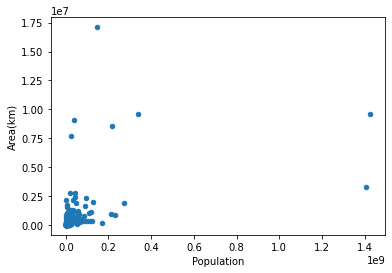

In [ ]:
#5th point
dataset.plot.scatter(x = 'Population', y = 'Area(km)')